<a href="https://colab.research.google.com/github/Nikkiie/Bike-sharing-demand-prediction-Cap-2-/blob/main/Bike_sharing_demand_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **PROJECT TITLE - Seoul Bike Sharing Demand Prediction** 

# **PROJECT SUMMARY:**
 
 **Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.**

 # **Data Description:**

 **Attribute Information:**

  --> Date : year-month-day

  --> Rented Bike count - Count of bikes rented at each hour

  --> Hour - Hour of he day

  --> Temperature-Temperature in Celsius

  --> Humidity - %

  --> Windspeed - m/s

  --> Visibility - 10m

  --> Dew point temperature - Celsius

  --> Solar radiation - MJ/m2

  --> Rainfall - mm

  --> Snowfall - cm

  --> Seasons - Winter, Spring, Summer, Autumn

  --> Holiday - Holiday/No holiday

  --> Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

**GitHub Link**

### Know Your Data

**Importing Libraries**

In [ ]:
# Importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

**Loading the dataset**

In [ ]:
#Mounting the drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Giving the file path

file_path = ('/content/drive/MyDrive/cap 2/SeoulBikeData (1).csv')
df = pd.read_csv(file_path, encoding = 'ISO-8859-1')

**Dataset First View**

In [ ]:
# It is a good habit to copy the data for backup
df = df.copy()

In [ ]:
# Checking top 5 rows in dataframe
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
# Checking last 5 rows in dataframe
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


**Dataset Rows & Columns count**

In [ ]:
# Data shape
df.shape

(8760, 14)

In [ ]:
#Check all the coloumns present in our dataset
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

**Dataset Informationt**

In [ ]:
# data dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

**Duplicate Values**

In [ ]:
# Checking duplicates
print(len(df[df.duplicated()]))

0


**Missing Values/Null Values**

In [ ]:
# Missing data counts
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

**Understanding Your Variables**

In [ ]:
# Statistical information

df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


-- Hour columns is normally distributed

-- Rest of the columns have certain percentage of skew.

**Checking Unique Values**

In [ ]:
#checking unique values

df.columns.unique()

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
#checking unique values for seasons
df['Seasons'].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [ ]:
#checking unique values for holiday
df['Holiday'].unique()

array(['No Holiday', 'Holiday'], dtype=object)

In [ ]:
#checking unique values for functioning day
df['Functioning Day'].unique()

array(['Yes', 'No'], dtype=object)

**Data Wrangling**

In [ ]:
# changing Date column to datetime dataype.
df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y")

In [ ]:
# Extracting 'Day','Month' and 'Year' from 'Date' column

df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month_name()
df['Day']=df['Date'].dt.day_name()

In [ ]:
# Changing int64 to object for 'Year' columns

df['Year']=df['Year'].astype('object')

* Now, we have created three new columns, i.e. 'Day','Month' and 'Year'.

* "Year" columns is of integer data types, we have to change it to object data types.


In [ ]:
#checking df info
df.info()

In [ ]:
# categorizing numerical and categorical columns
numeric_cols = df.select_dtypes(['int64','float64']).columns.tolist()
categorical_cols = df.select_dtypes(['object','category']).columns.tolist()

**Checking outliers**

* Outlier are values from data which behave different and cause problem during model fitting.
* We can keep it for information gain or we can remove them.

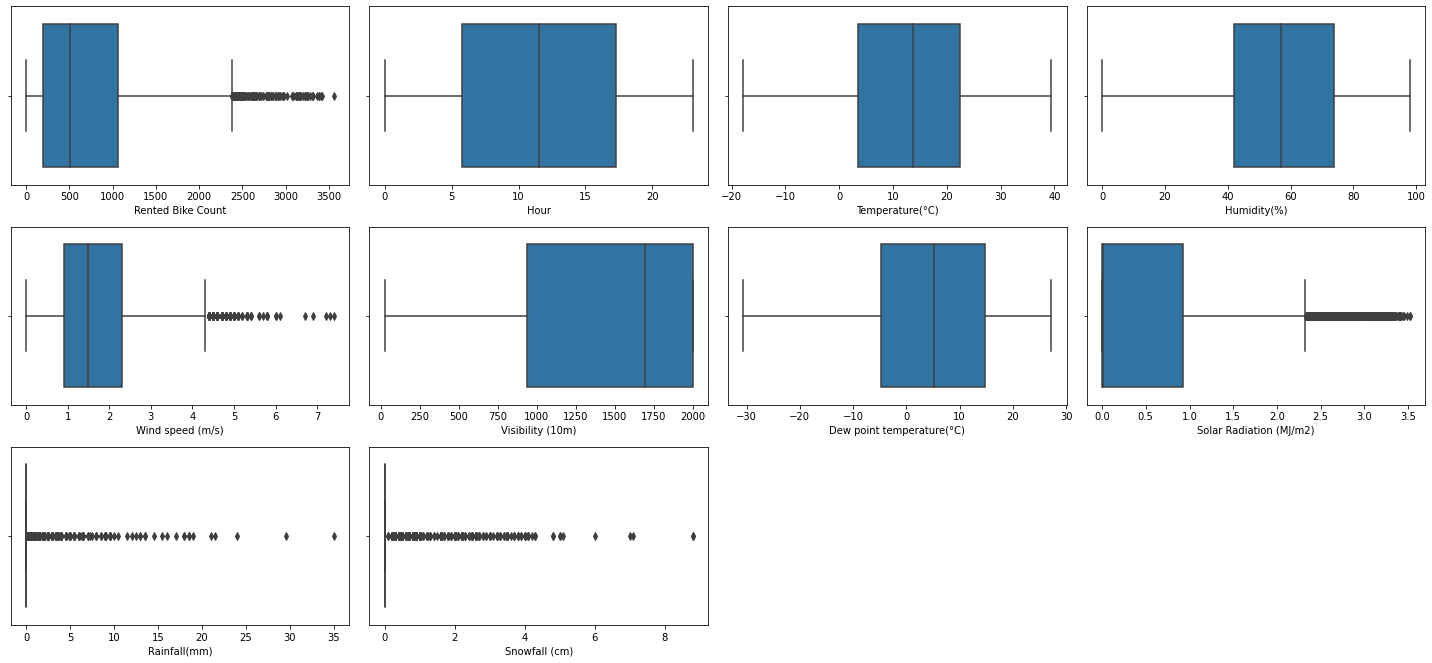

In [ ]:
# outlier detection
# plotting boxplot for numerical columns

n = 1
plt.figure(figsize=(20,15))
for column in numeric_cols:
    plt.subplot(5,4,n)
    n = n+1
    sns.boxplot(df[column])
    plt.tight_layout()
plt.show()

* Since we are interested in bike demand data analysis, hence considering only those data whose rented bike count greater than zero.

### Data Visualization

**Count of rented bikes per hour basis.**

* Plot- A bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle

* It shows relative numbers or proportions of multiple categories.

* We can summarize a large data set in visual form.

* Also we can estimate key values at a glance.

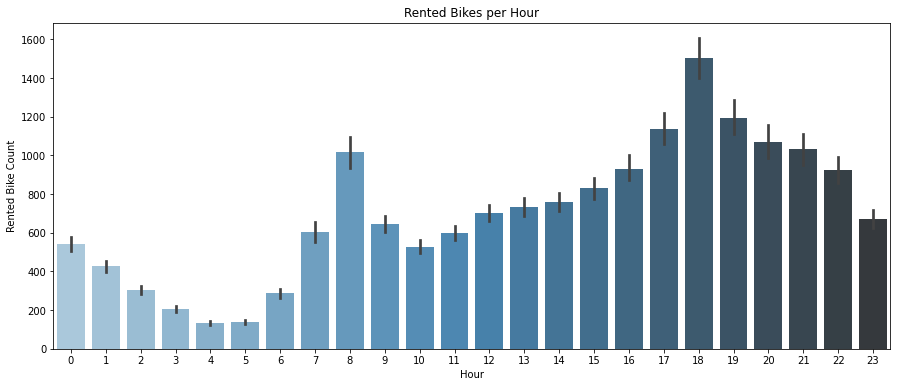

In [ ]:
# plotting count of rented bikes per hour.
plt.figure(figsize=[15,6])
plt.title('Rented Bikes per Hour')
sns.barplot(data=df, x='Hour', y='Rented Bike Count', palette="Blues_d")

--Bikes are mostly rented at 8am and between 5pm to 9pm (peaking at 6pm).

**Count of rented bike on the basis of month(Holiday and no holiday)**

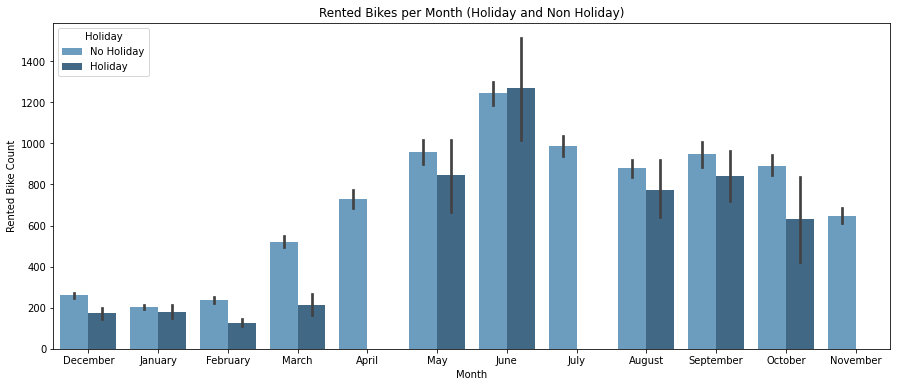

In [ ]:
# plotting rented bike count on the basis of months.
plt.figure(figsize=[15,6])
plt.title('Rented Bikes per Month (Holiday and Non Holiday)')
sns.barplot(data=df, x='Month', y='Rented Bike Count', hue='Holiday', palette="Blues_d")

-- Demand is high during the month of may, june and july

**Demand of bike at different temperature.**

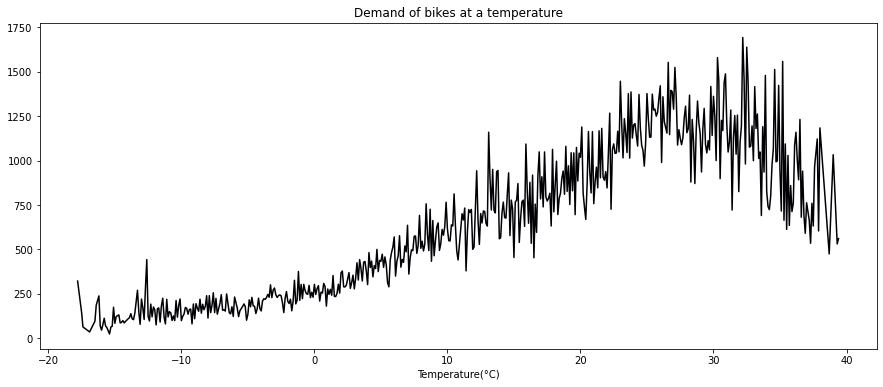

In [ ]:
# plotting the affect of temperature on demand of bikes.

df.groupby('Temperature(°C)')['Rented Bike Count'].mean().plot(figsize=[15,6], title='Demand of bikes at a temperature', colormap='inferno')

-- The demand for bikes is pretty high between 25°C and 35°C.

**Demand of bike at solar radiation**

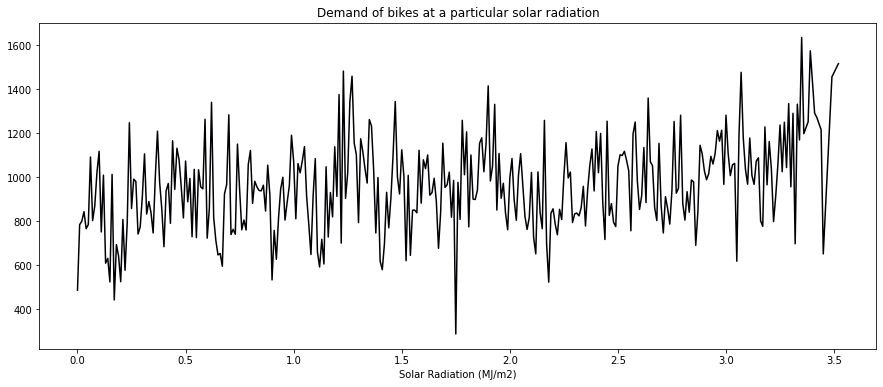

In [ ]:
# Solar Radiation vs Count of rented bikes
df.groupby('Solar Radiation (MJ/m2)')['Rented Bike Count'].mean().plot(figsize=[15,6], title='Demand of bikes at a particular solar radiation', colormap='inferno')

-- In presence of solar radiation,the demand remains nearly constant.

**Demand of bikes at ranifall**

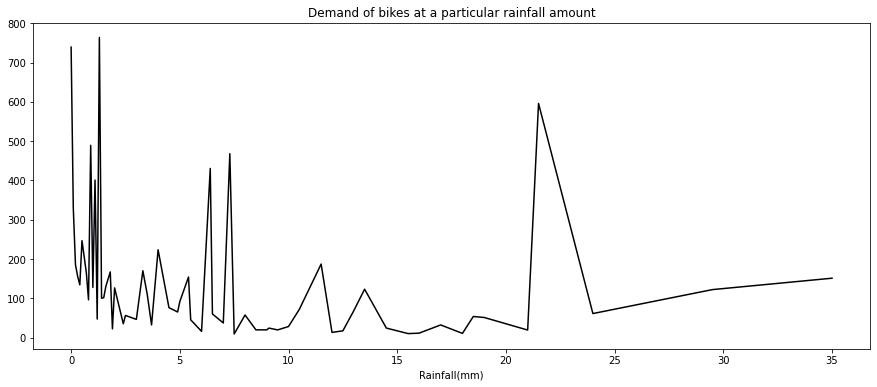

In [ ]:
# Rainfall vs Count of rented bikes
df.groupby('Rainfall(mm)')['Rented Bike Count'].mean().plot(figsize=[15,6], title='Demand of bikes at a particular rainfall amount',colormap='inferno')


-- The demand decreases when it rains.

**Demand of bikes at snowfall**

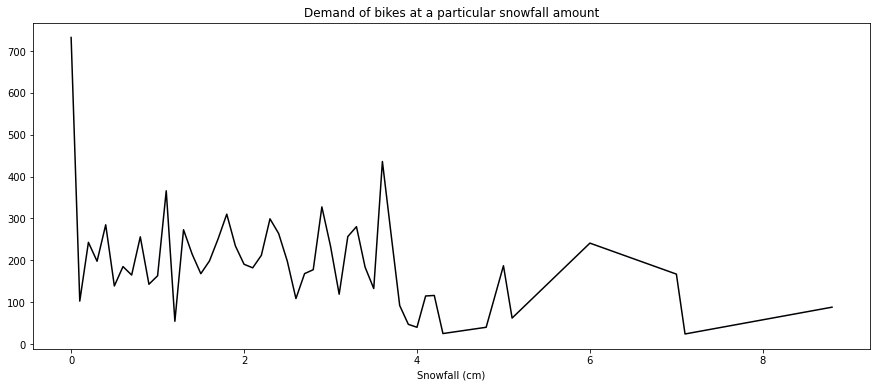

In [ ]:
# Snowfall vs Count of rented bikes
df.groupby('Snowfall (cm)')['Rented Bike Count'].mean().plot(figsize=[15,6], title='Demand of bikes at a particular snowfall amount',colormap='inferno')

-- The demand decreases when it snows.

**Bike rented in hours in different seasons**

Plot - Line plot provides a high-level interface for drawing attractive and informative statistical graphics. 

* The colors stand out, the layers blend nicely together, the contours flow throughout, and the overall package not only has a nice aesthetic quality, but it provides meaningful insights to us as well.

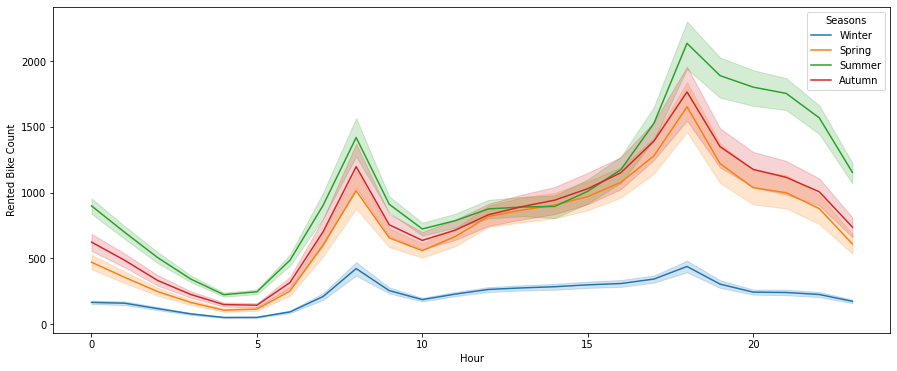

In [ ]:
plt.figure(figsize=[15,6])
sns.lineplot(data=df, x='Hour', y='Rented Bike Count', hue='Seasons')

-- In each season, the demand peaks around 8am and 6pm-highest

**Bike rented in different days**

In [ ]:
#creating a day df
day_df = df.groupby(['Day']).mean()
day_df.reset_index(level=0, inplace=True)


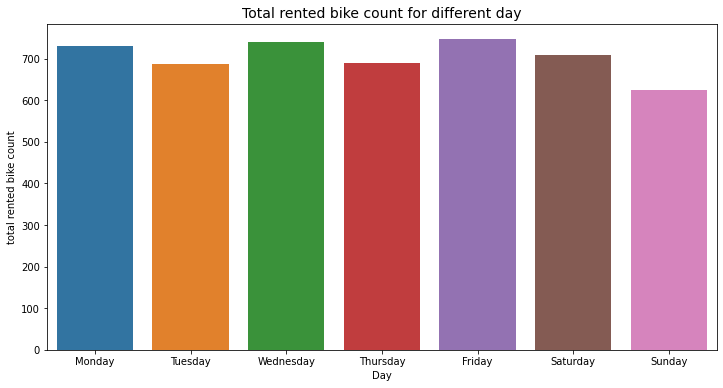

In [ ]:
# setting figure size
fig, ax = plt.subplots(1,1, figsize=(12,6))

# reindexing day 
reindex = ['Monday', 'Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
day_df['Day'] = pd.Categorical(day_df['Day'],categories=reindex,ordered=True)

# plotting
sns.barplot('Day','Rented Bike Count', data=day_df, ci=None )
plt.title('Total rented bike count for different day',fontsize=14)

# setting up x and y label
plt.xlabel("Day")
plt.ylabel("total rented bike count")
plt.show()

-- Sunday has very less number of booking

-- Maximum number of booking is on friday followed by wednesday and monday

**Bike rented in different seasons**

Plot - It represents data visually as a fractional part of a whole, which can be an effective communication tool for the even uninformed audience.

* It enables us to see comparison at a glance to make an immediate analysis or to understand information quickly.

* The need for readers to examine or measure underlying numbers themselves are removed by using this chart.

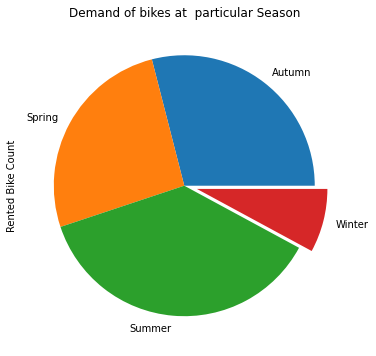

In [ ]:
# Season wise demand of bikes.

df.groupby('Seasons')['Rented Bike Count'].sum().plot(kind='pie', figsize=[10,6], title='Demand of bikes at  particular Season',explode = [0,0,0,0.1])

-- Most demanding season is Summer, followed by Autumn and Spring.

---



 -- Demand decreases on winter season.

**Demand of bike on type of days**

In [ ]:
# creating a new feature 'type of day' with two unique value i.e. "weekend" and "weekday"
df['type of day'] = df['Day'].apply(lambda x: "weekend" if x=='Saturday' or x=='Sunday' else "weekday")

In [ ]:
# group by type of day
type_of_day_df = df.groupby('type of day').sum().reset_index().iloc[:, [0,1]]
type_of_day_df

,type of day,Rented Bike Count
0,weekday,4506628
1,weekend,1665686


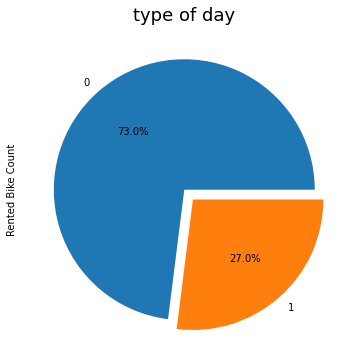

In [ ]:
# setting figure size
plt.figure(figsize=(12,6))

#plotting pie plot
type_of_day_df['Rented Bike Count'].plot(kind='pie', subplots=True, figsize=(8, 8),autopct='%1.1f%%',explode = [0,0.1])

# setting up title
plt.title('type of day',fontsize=18)
plt.show()

-- 73% of bike booked on weekday and remaining 27% are book on weekend

-- The possible reason for this is people have compulsion to go their office, hence they book bike so that they reach office on time.

-- On weekend people booked bike only for their pending work.

**Demand of bike during holiday and no holiday**

In [ ]:
# group by holiday
holiday_df = df.groupby('Holiday').sum()

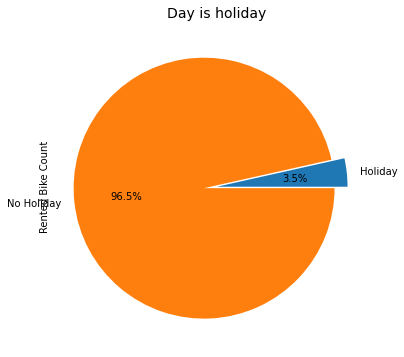

In [ ]:
# setting figure size
plt.figure(figsize=(12,6))

# plotting
holiday_df['Rented Bike Count'].plot(kind='pie', subplots=True, figsize=(8, 8),autopct='%1.1f%%',explode=(0,0.1))
plt.title('Day is holiday',fontsize=14)
plt.show()
     

-- On holiday, very less number (3.5 %) of bike are booked it can be concluded that due to seat limitation, on weekend, people with there family cannot go with bike, and so they prefer to book some other medium of transport to travel.

* After visualization we can note that--

* Rented bike count follow a similar pattern for each of the four seasons which is, on office starting time (08 :00 for morning shift and 6:00 for night shift) and office leaving time (08 :00 for evening shift and 6:00 for night shift) there are maximum number of booking.

* Booking count on working day is more than holiday.

* For each month, peak time is 08:00 am in morning and 4::00 in the evening, the possible reason for this timing is office hour.

* On winter there is very less number of bookings as compare to other seasons, possible reason for this could be temperature is very less.

* Saturday and Sunday (weekend) do not show peak on 08:00 hours and 16:00 hours, possible reason for this is holiday.

### Feature Engineering & Data Pre-processing


In [ ]:
# categorizing numerical and categorical columns
numeric_cols = df.select_dtypes(['int64','float64']).columns.tolist()
categorical_cols = df.select_dtypes(['object','category']).columns.tolist()

In [ ]:
# checking for numerical columns
numeric_cols

['Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)']

In [ ]:
# checking for categorical columns
categorical_cols

['Seasons',
 'Holiday',
 'Functioning Day',
 'Year',
 'Month',
 'Day',
 'type of day']

In [ ]:
# checking information of dataset again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

**Closer look on columns**

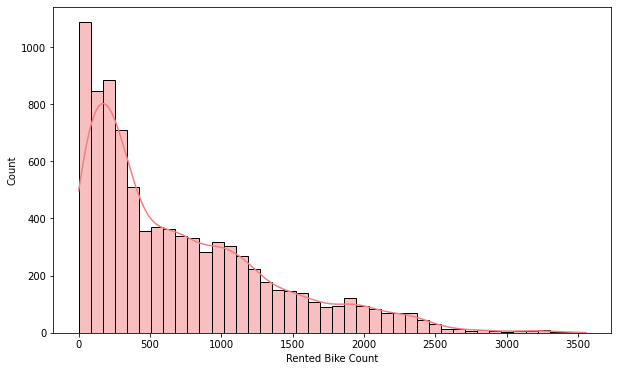

In [ ]:
# for rented bike count
plt.figure(figsize=[10,6])
sns.histplot(data=df, x='Rented Bike Count', kde=True, color='lightcoral')

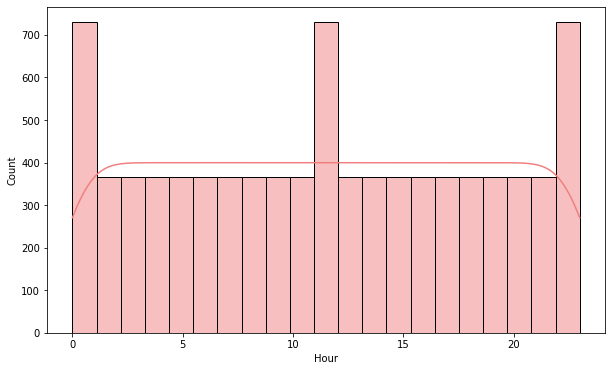

In [ ]:
# for hour
plt.figure(figsize=[10,6])
sns.histplot(data=df, x='Hour', kde=True, color='lightcoral')

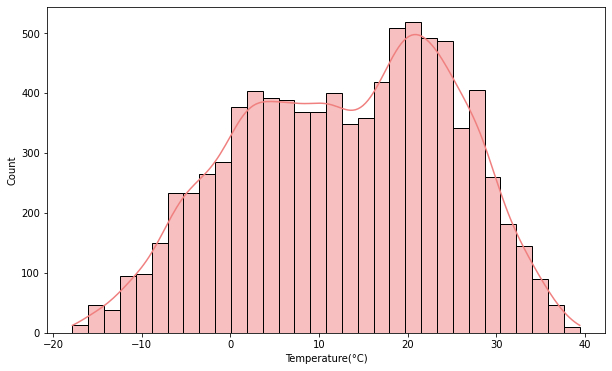

In [ ]:
# for temperature
plt.figure(figsize=[10,6])
sns.histplot(data=df, x='Temperature(°C)', kde=True, color='lightcoral')

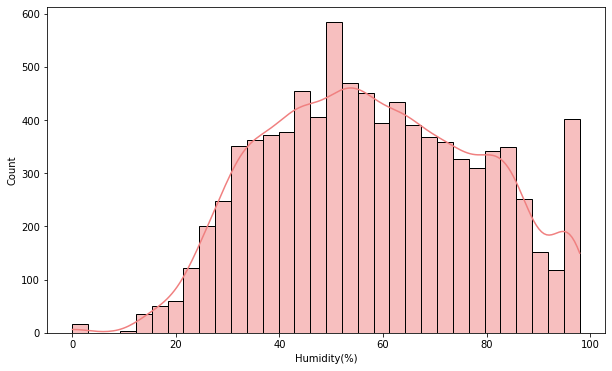

In [ ]:
# for humidity
plt.figure(figsize=[10,6])
sns.histplot(data=df, x='Humidity(%)', kde=True, color='lightcoral')

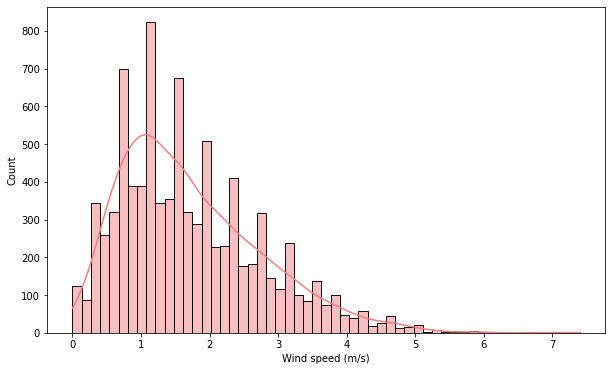

In [ ]:
# for wind speed

plt.figure(figsize=[10,6])
sns.histplot(data=df, x='Wind speed (m/s)', kde=True, color='lightcoral')

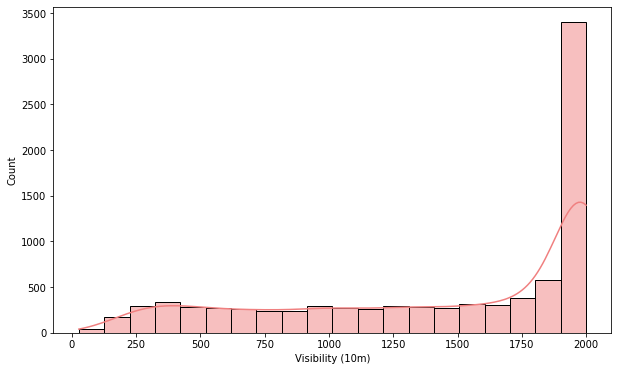

In [ ]:
# for visibility
plt.figure(figsize=[10,6])
sns.histplot(data=df, x='Visibility (10m)', kde=True, color='lightcoral')

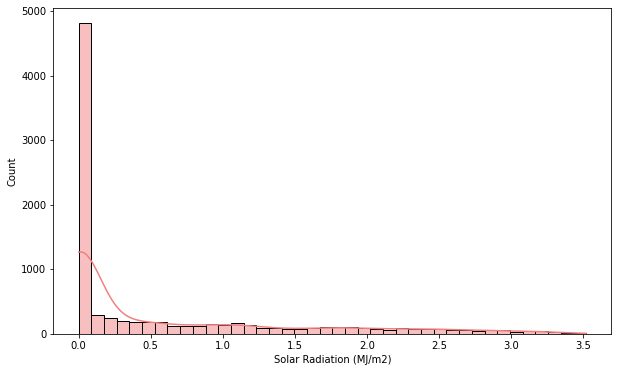

In [ ]:
# for solar radiation
plt.figure(figsize=[10,6])
sns.histplot(data=df, x='Solar Radiation (MJ/m2)', kde=True, color='lightcoral')

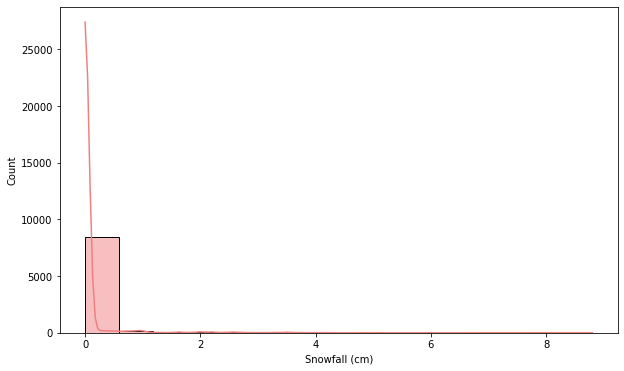

In [ ]:
# for snowfall
plt.figure(figsize=[10,6])
sns.histplot(data=df, x='Snowfall (cm)', kde=True, color='lightcoral')

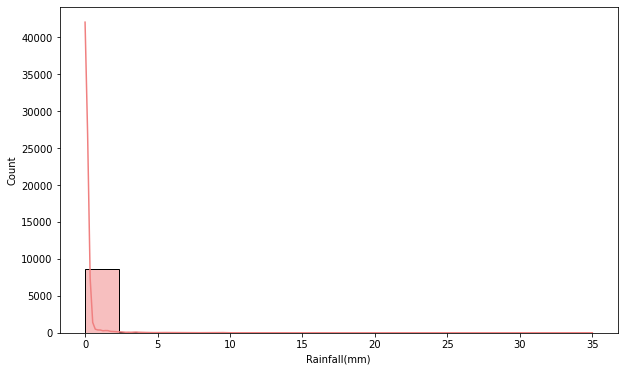

In [ ]:
# for ranifall
plt.figure(figsize=[10,6])
sns.histplot(data=df, x='Rainfall(mm)', kde=True, color='lightcoral')

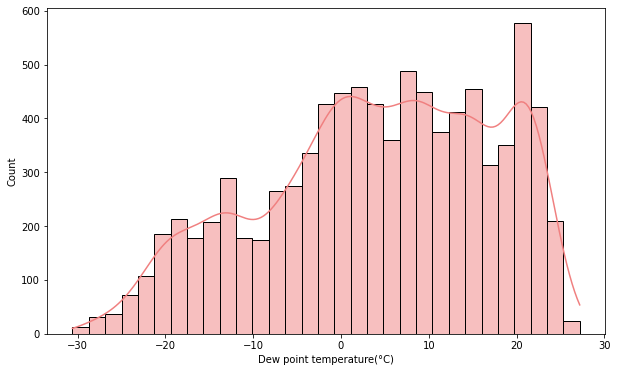

In [ ]:
# for dew point temperature
plt.figure(figsize=[10,6])
sns.histplot(data=df, x='Dew point temperature(°C)', kde=True, color='lightcoral')

**Checking for skewness**

Text(0.5, 1.0, 'Bike_Count Before Transformation')

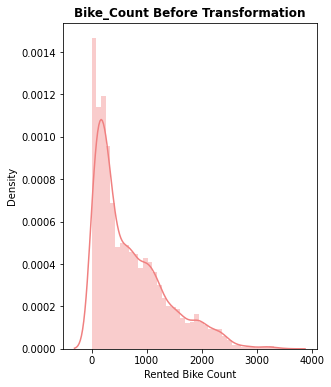

In [ ]:
# plotting figure and checking for skewness
plt.figure(figsize=(10,6))
plot = plt.subplot(1,2,1)
color = 'lightcoral'
sns.distplot(df['Rented Bike Count'],color = 'lightcoral').set_title('Bike_Count Before Transformation',weight='bold') 

-- Our target variable i.e. "Rented Bike Count" is positively skewed and as per assumption of linear regression,target variable must be normally distributed, hence checking some transformations which are "sq transform", "sqrt transform" or "log transform" so that we can convert it into normal form.

Text(0.5, 1.0, 'square')

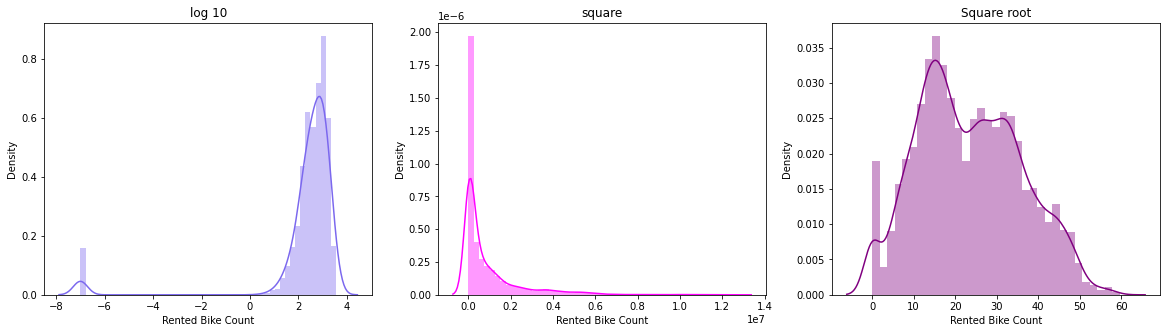

In [ ]:
# Checking some tranformations on target variable'Rented Bike Count'

fig,axes = plt.subplots(1,3,figsize=(20,5))
sns.distplot(np.sqrt(df['Rented Bike Count']),ax=axes[2], color='purple').set_title("Square root")  #applying Square root transformation
sns.distplot(np.log10(df['Rented Bike Count']+0.0000001),ax=axes[0],color='mediumslateblue').set_title("log 10") #applying log transformation
sns.distplot((df['Rented Bike Count']**2),ax=axes[1],color='magenta').set_title("square") #applying Square transformation

-- Sqrt is giving the best result for skewness

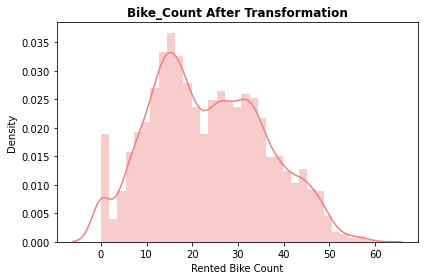

In [ ]:
# applying sqrt transformation
plot = plt.subplot(1,1,1)
sns.distplot(np.sqrt(df['Rented Bike Count']), color = 'lightcoral').set_title('Bike_Count After Transformation',weight='bold')
plt.tight_layout()

### Correlation

Heatmap - The major benefit of heatmap visualization is that it enables data to be presented visually which allows us to easily consume information and make more sense of it.

* A heat map represents the coefficients to visualize the strength of correlation among variables. 

* It helps find features that are best for Machine Learning model building.

* It transforms the correlation matrix into color coding.

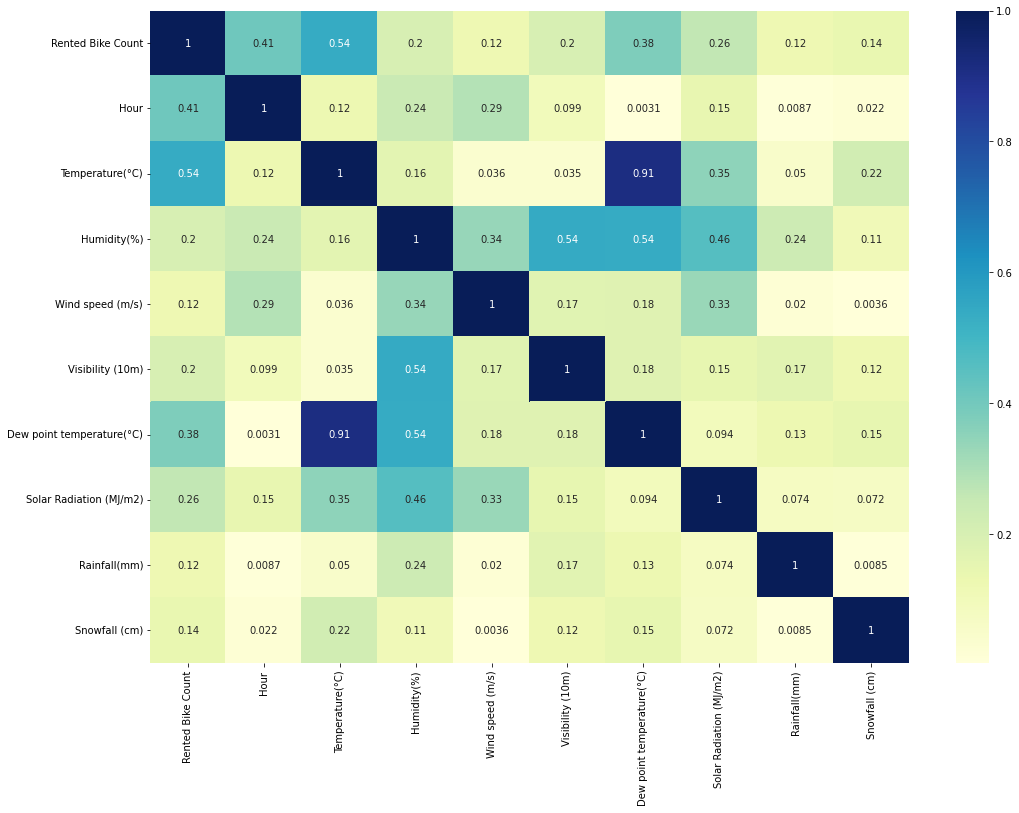

In [ ]:
# plotting corr using heatmap
plt.figure(figsize=[17,12])
sns.heatmap(abs(df.corr()), annot=True, cmap='YlGnBu')

-- Temperature shows high collinearity with dew point temperature.

-- Humidity and visibility are moderately correlated.

-- Temperature and hour show positive correlation with rented bike count.

-- As per domain knowledge, there dew point temperature column is irrelavant to find the rented bike count.

-- Hence, we can drop dew point temperature columns.

In [ ]:
# Dropping the Dew point temp column
df = df.drop('Dew point temperature(°C)',axis=1)

-- As we have extracted 'Day', 'Month' and 'year' from 'date' column hence, we can drop date column.

In [ ]:
# Dropping the Date column
df = df.drop('Date',axis=1)

**Multicollinearity**

* Multicollinearity occurs when independent variables are correlated.

* If we identify which variables are affected by multicoll then VIF(variation inflation factor) identifies correlation between independent variables.

* We can fix it by dropping some of correlated predictors, which we did.

In [ ]:
# Function to calculate Multicollinearity

def total_vif(x):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = x.columns
    vif["VIF"] = [variance_inflation_factor(x.values, cols) for cols in range(x.shape[1])]

    return(vif)

In [ ]:
# multicollinearity result
total_vif(df[[i for i in numeric_cols if i not in ['Rented Bike Count','Date','Dew point temperature(°C)']]])
     

,variables,VIF
0,Hour,3.921832
1,Temperature(°C),3.228318
2,Humidity(%),4.868221
3,Wind speed (m/s),4.608625
4,Visibility (10m),4.710170
5,Solar Radiation (MJ/m2),2.246791
6,Rainfall(mm),1.079158
7,Snowfall (cm),1.120579


-- VIF is less than 5 hence we can say there is no multicollinearity between independent features

-- We can drop year column as data is given for period on one year, hence there is no use for year column.

In [ ]:
#Dropping year column 
df = df.drop('Year',axis=1)

**Encoding**

* Label enc - It is used when we have ordinal variables i.e (used whenever we have order in particular column).

EX - Good-3, Bad-2, Worse-1

* One hot enc - For categorical variable where there is no ordering or relationship in between, there label enc is not useful in such we can use one hot enc.

* It converts categorical value into a new categorical column and matches with binary values (0 & 1)

EX - We have 3 colors R,B,Y OHE makes a table with values 1 & 0 and put 1if value is present and rest as 0.

* We specify drop_first = True in OHE because if we have 4 col and we OHE we get different values and by making 4 dummy variable we get multicollinearity.

* Because 1 column is dependent on another by using drop_first = True it only encodes 3 category if there are 4 and hence there is no multicollinearity.

In [ ]:
# Defining a label encoder
# Replacing Holiday and No Holiday with Yes and No
label = {'Holiday': {'Holiday': 'Yes', 'No Holiday': 'No'}}
df = df.replace(label)


In [ ]:
# dummification of categorical variables.
df_ohe= pd.get_dummies(df, columns=['Seasons', 'Holiday', 'Functioning Day', 'Month', 'Day','type of day'],drop_first=True) 
     

### Modelling

In [ ]:
# Checking values
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Day,type of day
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No,Yes,December,Friday,weekday
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No,Yes,December,Friday,weekday
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No,Yes,December,Friday,weekday
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No,Yes,December,Friday,weekday
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No,Yes,December,Friday,weekday


**Seperating independent and dependent variables.**

* Independent variables are the ones that we include in the model to explain or predict changes in the dependent variable. The name helps us to understand their role in statistical analysis. These variables are independent.

* The dependent variable is what we want to use the model to explain or predict. The values of this variable depend on other variables. It’s also known as the response variable or outcome variable.

In [ ]:
# independent and dependent variables
x = df_ohe.drop(columns=['Rented Bike Count'])
y = np.sqrt(df_ohe['Rented Bike Count'])

**Splitting train and test data.**

* Before, fitting any model we split the dataset into a training and test set. 

* Doing this means some proportions of the data will go into training the model and some portion will be used to evaluate how our model is performing on any unseen data. 

* The proportions may vary from 60:40, 70:30, 75:25  but mostly  80:20 is used for training and testing respectively. 



In [ ]:
# Train test split our data
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state = 0)

In [ ]:
# Checking x train head
X_train.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_Spring,Seasons_Summer,...,Month_November,Month_October,Month_September,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,type of day_weekend
2031,15,8.2,62,0.6,291,1.22,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
6570,18,28.4,57,2.4,2000,0.84,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0
6371,11,29.9,57,1.7,1992,0.88,0.1,0.0,0,1,...,0,0,0,0,0,0,1,0,0,0
3490,10,14.8,29,0.6,1749,2.20,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,1,0
7700,20,12.2,47,1.1,2000,0.00,0.0,0.0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [ ]:
# Transforming data
sc = MinMaxScaler()
x_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)

* We use min max scaler after train-test split.

* We do this after train test because it can happen that minimum value can come in test data, where we would have split the data.

* And same will be used in train data and hence data lekage can happen.

In [ ]:
#checking shape
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((7008, 31), (1752, 31), (7008,), (1752,))

### Linear Regression

* Linear regression is simple and easy to implement algorithmn, it can be trained easily and effectively even on system with low computational power,

* Linear regression model describes the relationship between a dependent variable y, and one or more independent variables, X.

* Although it's susceptible to overfitting, it can be avoided with the help of dimensionality reduction techniques.

In [ ]:
# Fitting Multiple Linear Regression to the Training set
lr_bike = LinearRegression()
lr_bike.fit(x_train, y_train)

LinearRegression()

In [ ]:
# Predicting the Train set results
y_pred_train_lr = lr_bike.predict(x_train)

# Predicting the Test set results
y_pred_test_lr = lr_bike.predict(x_test)

For train dataset

In [ ]:
# r2 score of train set
R2 = r2_score(y_train, y_pred_train_lr)
print("R2 Score:" ,R2)

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_pred_train_lr)
print("Mean Absolute Error (MAE):", MAE)

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train_lr)
print("Mean Squred Error(MSE):" , MSE)

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print("Root Mean Squared Error(RMSE):", RMSE)


R2 Score: 0.6838131588554944
Mean Absolute Error (MAE): 5.347759909420434
Mean Squred Error(MSE): 48.79810253584491
Root Mean Squared Error(RMSE): 6.985563866707176


In [ ]:
# saving train result in dictionary.
train_dict={'data': "Train data",
            'Model':"Linear Regression",
             'MAE':MAE,
             'MSE':MSE,
             'RMSE':RMSE,
             'R2_score':R2,}

In [ ]:
# create training_result dataframe
traing_results_df=pd.DataFrame(train_dict,index=[1])
traing_results_df

,data,Model,MAE,MSE,RMSE,R2_score
1,Train data,Linear Regression,5.34776,48.798103,6.985564,0.683813


For test dataset

In [ ]:
# r2 score of test set
R2 = r2_score(y_test, y_pred_test_lr)
print("R2 Score:" ,R2)

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred_test_lr)
print("Mean Absolute Error (MAE):", MAE)

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred_test_lr)
print("Mean Squred Error(MSE):" , MSE)

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print("Root Mean Squared Error(RMSE):", RMSE)

R2 Score: 0.6862157760260094
Mean Absolute Error (MAE): 5.387692453893435
Mean Squred Error(MSE): 49.41670299499023
Root Mean Squared Error(RMSE): 7.029701486904706


In [ ]:
#saving test result in dictionary.

test_dict={'data': "Test data",
            'Model':"Linear Regression",
             'MAE':MAE,
             'MSE':MSE,
             'RMSE':RMSE,
             'R2_score':R2,
             }

In [ ]:
# creating test_result dataframe
test_results_df=pd.DataFrame(test_dict,index=[1])
test_results_df
     

,data,Model,MAE,MSE,RMSE,R2_score
1,Test data,Linear Regression,5.387692,49.416703,7.029701,0.686216


In [ ]:
# coefficient
lr_bike.coef_

array([ 10.87366013,  32.39583103, -14.10704081,   1.16142163,
         2.25974931,  -3.67715242, -51.99871259,   0.21649072,
        -1.15971552,  -1.50148666,  -3.26948978,  -3.13656831,
        28.91545201,  -4.34117303,   0.39929825,  -2.15725499,
        -1.51153304,  -1.73342898,   4.57311534,  -0.53419207,
         2.32056403,   2.44415223,   3.27105463,   0.21548511,
        -1.3004018 ,   0.09711841,  -1.50491056,  -0.71299941,
        -0.55103179,  -0.4666331 ,  -1.40779216])

In [ ]:
# intercept
lr_bike .intercept_

-17.541441107490613

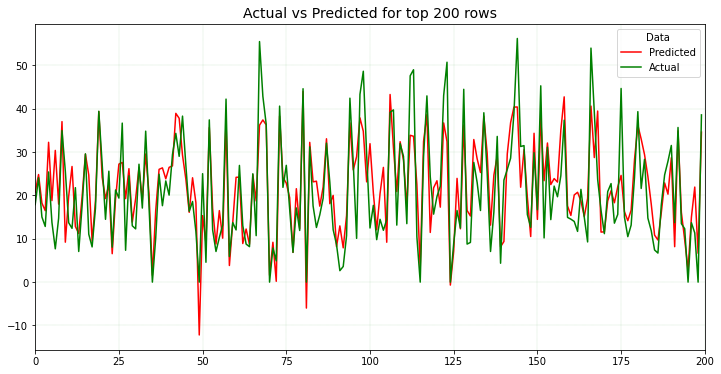

In [ ]:
#plotting actual vs predicted for linear regg
plt.figure(figsize=(12,6))
plt.plot((y_pred_test_lr)[:200],color ='r')
plt.plot((np.array(y_test)[:200]),color ='g')

#setting up legend
plt.legend(["Predicted","Actual"],fontsize=10 ,title='Data')

# setting range on x-axis
plt.xlim([0, 200])
plt.grid(color = 'green', linestyle = '--', linewidth = 0.1)

# setting up title
plt.title('Actual vs Predicted for top 200 rows',fontsize=14)

plt.show()

**Hyperparameter tuning**


* A Machine Learning model is defined as a mathematical model with a number of parameters that need to be learned from the data.

* However, there is another kind of parameter, known as Hyperparameters, that cannot be directly learned from the regular training process. 

*  These parameters express important properties of the model such as its complexity or how fast it should learn. 

* Models can have many hyperparameters and finding the best combination of parameters can be treated as a search problem. One of the best strategies for Hyperparameter tuning is:

**GridSearchCV**

* In GridSearchCV approach, the machine learning model is evaluated for a range of hyperparameter values

* The grid search technique construct many versions of the model with all possible combinations of hyperparameters and will return the best one. 

### Decision tree with GridSearchCV

In [ ]:
#applying decision tree
decisionTree = DecisionTreeRegressor()

param = {'max_depth' : [1,4,5,6,7,8,10,15,20]}

gridSearch_decisionTree=GridSearchCV(decisionTree,param,cv=10)
gridSearch_decisionTree.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 4, 5, 6, 7, 8, 10, 15, 20]})

In [ ]:
best_param_gridSearch_decisionTree=gridSearch_decisionTree.best_params_
best_param_gridSearch_decisionTree

{'max_depth': 15}

In [ ]:
# Predicting the Train set results
Y_pred_decTreeGridSearch_train = gridSearch_decisionTree.predict(X_train)

# Predicting the Test set results
Y_pred_decTreeGridSearch_test = gridSearch_decisionTree.predict(X_test)

For train dataset

In [ ]:
# r2 score of train set
R2 = r2_score(y_train, Y_pred_decTreeGridSearch_train)
print("R2 Score:" ,R2)

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_train,Y_pred_decTreeGridSearch_train)
print("Mean Absolute Error (MAE):", MAE)

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,Y_pred_decTreeGridSearch_train)
print("Mean Squred Error(MSE):" , MSE)

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print("Root Mean Squared Error(RMSE):", RMSE)


R2 Score: 0.9898722597921581
Mean Absolute Error (MAE): 0.6206385772229446
Mean Squred Error(MSE): 1.5630457717017965
Root Mean Squared Error(RMSE): 1.2502182896205751


In [ ]:
# saving train result in dictionary.
train_dict={'data': "Train data",
            'Model':"DecisionTreeRegressor with GridSearchCV",
             'MAE':MAE,
             'MSE':MSE,
             'RMSE':RMSE,
             'R2_score':R2,
             }

In [ ]:
# creating training_result dataframe
traing_results_df=pd.DataFrame(train_dict,index=[1])
traing_results_df

,data,Model,MAE,MSE,RMSE,R2_score
1,Train data,DecisionTreeRegressor with GridSearchCV,0.620639,1.563046,1.250218,0.989872


For test dataset

In [ ]:
# r2 score of test set
R2 = r2_score(y_test, Y_pred_decTreeGridSearch_test)
print("R2 Score:" ,R2)

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,Y_pred_decTreeGridSearch_test)
print("Mean Absolute Error (MAE):", MAE)

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,Y_pred_decTreeGridSearch_test)
print("Mean Squred Error(MSE):" , MSE)

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print("Root Mean Squared Error(RMSE):", RMSE)

R2 Score: 0.8867602833951402
Mean Absolute Error (MAE): 2.596399365738786
Mean Squred Error(MSE): 17.83369913193297
Root Mean Squared Error(RMSE): 4.222996463642016


In [ ]:
# saving test result in dictionary.
test_dict={'data': "Test data",
            'Model':"DecisionTreeRegressor with GridSearchCV",
             'MAE':MAE,
             'MSE':MSE,
             'RMSE':RMSE,
             'R2_score':R2,
             }

In [ ]:
# creating test_result dataframe
test_results_df=pd.DataFrame(test_dict,index=[1])
test_results_df

,data,Model,MAE,MSE,RMSE,R2_score
1,Test data,DecisionTreeRegressor with GridSearchCV,2.596399,17.833699,4.222996,0.88676


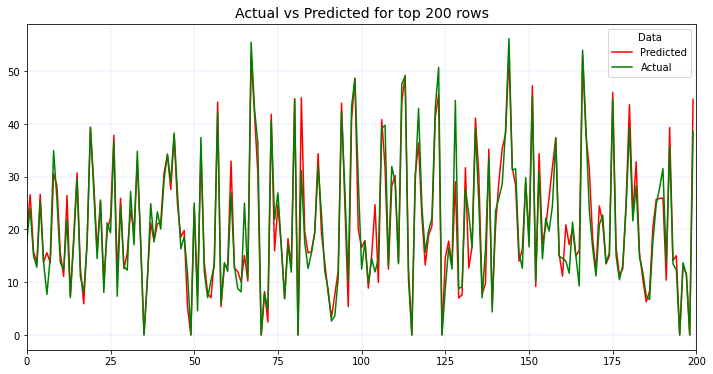

In [ ]:
#plotting actual vs predicted for decision tree
plt.figure(figsize=(12,6))
plt.plot((Y_pred_decTreeGridSearch_test)[:200],color ='r')
plt.plot((np.array(y_test)[:200]),color ='g')

#setting up legend
plt.legend(["Predicted","Actual"],fontsize=10,title='Data')

# setting range on x-axis
plt.xlim([0, 200])
plt.grid(color = 'blue', linestyle = '--', linewidth = 0.1)

# setting up title
plt.title('Actual vs Predicted for top 200 rows',fontsize=14)

plt.show()

### Random Forest with GridSearchCV

In [ ]:
#applying random forest
randomForestAlgo = RandomForestRegressor()
param = {'n_estimators' : [int(x) for x in np.linspace(start=10,stop=50, num=10)], 
         'max_depth' : [20,30,40],
         'min_samples_split':[2,4,6],
         'min_samples_leaf':[1,2,3],
         'bootstrap' : [True,False]
        }


gridSearch_RandomForest=GridSearchCV(randomForestAlgo,param,scoring='r2',cv=5)
gridSearch_RandomForest.fit(X_train,y_train)

best_randomForest=gridSearch_RandomForest.best_estimator_
bestRandomForest_testScore=best_randomForest.score(X_test,y_test)
r2_randomforest_test = best_randomForest.score(X_test,y_test)

In [ ]:
best_param_gridSearch_RandomForest=gridSearch_RandomForest.best_params_
best_param_gridSearch_RandomForest

{'bootstrap': True,
 'max_depth': 40,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

In [ ]:
# Predicting the Train set results
Y_pred_RndmfrstGridSearch_train = gridSearch_RandomForest.predict(X_train)

# Predicting the Test set results
Y_pred_RndmfrstGridSearch_test = gridSearch_RandomForest.predict(X_test)

For train dataset

In [ ]:
# r2 score of train set
R2 = r2_score(y_train, Y_pred_RndmfrstGridSearch_train)
print("R2 Score:" ,R2)

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_train,Y_pred_RndmfrstGridSearch_train)
print("Mean Absolute Error (MAE):", MAE)

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,Y_pred_RndmfrstGridSearch_train)
print("Mean Squred Error(MSE):" , MSE)

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print("Root Mean Squared Error(RMSE):", RMSE)

R2 Score: 0.9918453795800625
Mean Absolute Error (MAE): 0.6930207541791406
Mean Squred Error(MSE): 1.2585280334646871
Root Mean Squared Error(RMSE): 1.1218413584213622


In [ ]:
# saving train result in dictionary.
train_dict={'data': "Train data",
            'Model':"RandomForest with GridSearchCV",
             'MAE':MAE,
             'MSE':MSE,
             'RMSE':RMSE,
             'R2_score':R2,
              }

In [ ]:
# creating training_result dataframe
traing_results_df=pd.DataFrame(train_dict,index=[1])
traing_results_df

,data,Model,MAE,MSE,RMSE,R2_score
1,Train data,RandomForest with GridSearchCV,0.693021,1.258528,1.121841,0.991845


For test dataset

In [ ]:
# r2 score of train set
R2 = r2_score(y_test, Y_pred_RndmfrstGridSearch_test)
print("R2 Score:" ,R2)

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,Y_pred_RndmfrstGridSearch_test)
print("Mean Absolute Error (MAE):", MAE)

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,Y_pred_RndmfrstGridSearch_test)
print("Mean Squred Error(MSE):" , MSE)

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print("Root Mean Squared Error(RMSE):", RMSE)

R2 Score: 0.9412559379497897
Mean Absolute Error (MAE): 1.9259361459778979
Mean Squred Error(MSE): 9.251382463686706
Root Mean Squared Error(RMSE): 3.0416085322879254


In [ ]:
# saving test result in dictionary.
test_dict={'data': "Test data",
            'Model':"RandomForest with GridSearchCV",
             'MAE':MAE,
             'MSE':MSE,
             'RMSE':RMSE,
             'R2_score':R2,
             }

In [ ]:
# creating test_result dataframe
test_results_df=pd.DataFrame(test_dict,index=[1])
test_results_df

,data,Model,MAE,MSE,RMSE,R2_score
1,Test data,RandomForest with GridSearchCV,1.925936,9.251382,3.041609,0.941256


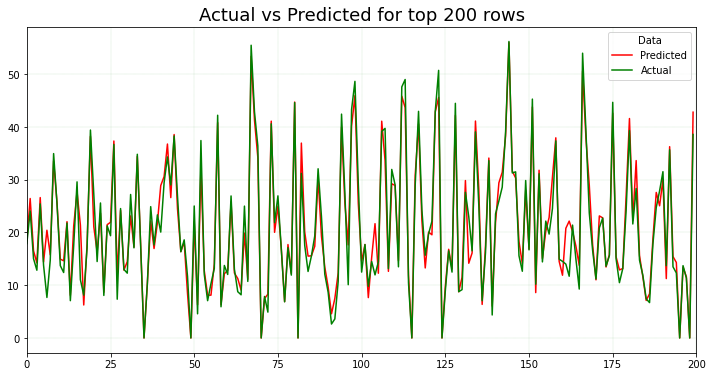

In [ ]:
#plotting actual vs predicted for random forest
plt.figure(figsize=(12,6))
plt.plot((Y_pred_RndmfrstGridSearch_test)[:200],color ='r')
plt.plot((np.array(y_test)[:200]),color ='g')

#setting up legend
plt.legend(["Predicted","Actual"],fontsize=10,title='Data')

# setting range on x-axis
plt.xlim([0, 200])
plt.grid(color = 'green', linestyle = '--', linewidth = 0.1)

# setting up title
plt.title('Actual vs Predicted for top 200 rows',fontsize=18)

plt.show()

### Gradient boosting

In [ ]:
#applying gradient boosting
from sklearn.ensemble import GradientBoostingRegressor

GradBoostAlgo=GradientBoostingRegressor()
GradBoostAlgo.fit(X_train,y_train)

GradientBoostingRegressor()

In [ ]:
# Predicting the Train set results
Y_pred_GradBoostAlgo_train = GradBoostAlgo.predict(X_train)

# Predicting the Test set results
Y_pred_GradBoostAlgo_test = GradBoostAlgo.predict(X_test)

For train dataset

In [ ]:
# r2 score of train set
R2 = r2_score(y_train, Y_pred_GradBoostAlgo_train)
print("R2 Score:" ,R2)

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_train,Y_pred_GradBoostAlgo_train)
print("Mean Absolute Error (MAE):", MAE)

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,Y_pred_GradBoostAlgo_train)
print("Mean Squred Error(MSE):" , MSE)

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print("Root Mean Squared Error(RMSE):", RMSE)

R2 Score: 0.9004032155519868
Mean Absolute Error (MAE): 2.8120919793947174
Mean Squred Error(MSE): 15.371082750130594
Root Mean Squared Error(RMSE): 3.920597244059965


In [ ]:
# saving train result in dictionary.
train_dict={'data': "Train data",
            'Model':"Gradient Boosting",
             'MAE':MAE,
             'MSE':MSE,
             'RMSE':RMSE,
             'R2_score':R2,
              }

In [ ]:
# creating training_result dataframe
traing_results_df=pd.DataFrame(train_dict,index=[1])
traing_results_df

,data,Model,MAE,MSE,RMSE,R2_score
1,Train data,Gradient Boosting,2.812092,15.371083,3.920597,0.900403


For test dataset

In [ ]:
# r2 score of train set
R2 = r2_score(y_test, Y_pred_GradBoostAlgo_test)
print("R2 Score:" ,R2)

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,Y_pred_GradBoostAlgo_test)
print("Mean Absolute Error (MAE):", MAE)

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,Y_pred_GradBoostAlgo_test)
print("Mean Squred Error(MSE):" , MSE)

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print("Root Mean Squared Error(RMSE):", RMSE)

R2 Score: 0.8874737096423438
Mean Absolute Error (MAE): 3.010421378585469
Mean Squred Error(MSE): 17.721344302488728
Root Mean Squared Error(RMSE): 4.2096727072883855


In [ ]:
# saving test result in dictionary.
test_dict={'data': "Test data",
            'Model':"Gradient Boosting",
             'MAE':MAE,
             'MSE':MSE,
             'RMSE':RMSE,
             'R2_score':R2,
             }

In [ ]:
# creating test_result dataframe
test_results_df=pd.DataFrame(test_dict,index=[1])
test_results_df

,data,Model,MAE,MSE,RMSE,R2_score
1,Test data,Gradient Boosting,3.010421,17.721344,4.209673,0.887474


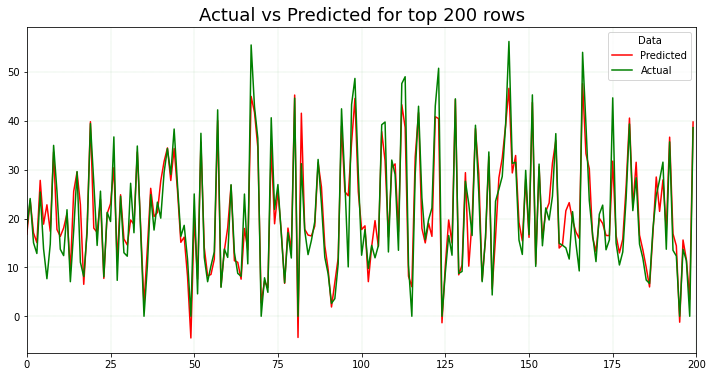

In [ ]:
#plotting actual vs predicted for gradient boosting
plt.figure(figsize=(12,6))
plt.plot((Y_pred_GradBoostAlgo_test)[:200],color ='r')
plt.plot((np.array(y_test)[:200]),color ='g')

#setting up legend
plt.legend(["Predicted","Actual"],fontsize=10,title='Data')

# setting range on x-axis
plt.xlim([0, 200])
plt.grid(color = 'green', linestyle = '--', linewidth = 0.1)

# setting up title
plt.title('Actual vs Predicted for top 200 rows',fontsize=18)

plt.show()	 

     


**Conclusion**



* By using Linear regression training R2_score 0.68 and test R2_score is 0.68.
It is not performing well


* By using DecisionTreeRegressor with GridSearchCV, training R2_score is 0.98 and for test data R2_score is 0.89. Model performance is improved but slightly increase in overfitting.

* By using RandomForest with GridSearchCV, training R2_score is 0.99 and test R2_score is 0.94. It is performing well.

* By using Gradient Boosting training R2_score 0.90 and test R2_score is 0.88.

* Random forest is giving best results with train R2_score of 0.99 and test R2_score 0.94.

* Most numbers of Bikes were rented in Summer, followed by Autumn, Spring, and Winter. May-July is the peak Bike renting Season, and Dec-Feb is the least preferred month for bike renting.

* Majority of the client in the bike rental sector belongs to the Working class. This is evident from EDA analysis where bike demand is more on weekdays, working days in Seoul.

* Temperature of 20-30 Degrees, evening time 4 pm- 8 pm,Humidity between 40%-60% are the most favorable parameters where the Bike demand is at its peak.

* Temperature, Hour of the day, Solar radiation are major driving factors for the Bike rent demand.

* Feature and Labels had a weak linear relationship, hence the prediction from the linear model was very low. Best predictions are obtained with a RandomForest model with grid search cv. 